## Case Study: Volcano Eruptions

#### Background Information
Volcanoes can pose a hazard to those who may live near one, to aircrafts flying through and large eruptions can have affect temperature. The explosivity of a volcano is measured by the Volcano Explosivity Index, VEI, which uses Volume of products, eruption cloud height, and qualitative observations to calculate a relative measurement. A few types of volcanoes are stratovolcanoes, shield volcanoes, calderas, and many others from pyroclastic cones to lava domes. Stratovolcanoes are also known as composite volcanoes and tend to have frequent explosive eruptions with a mixture of lava and pyroclastic material. These are supposedly the most common. Shield volcanoes are the largest on Earth and the eruptions consist close to entirely of lava. Calderas are formed with a volcano erupts with so much force that a summit collapses into the partial empty magma chamber below.


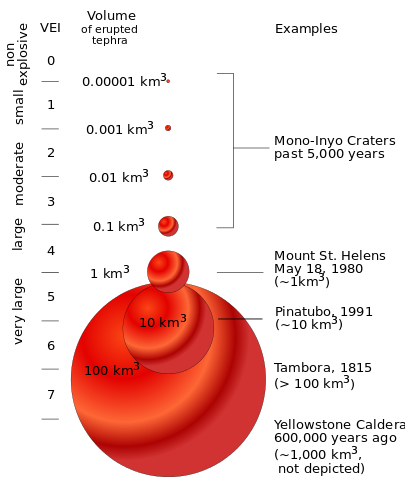


#### Hypothesis
Can elevation and location predict the VEI? This is the main hypothesis that I will explore, but I also plan to look at any patterns between the population in the vicinity of the volcano, the volcano type, the countries and the last year that the volcano erupted. 

#### Variables

Categorical:
* `primary_volcano_type`: 23 unique types
* `country`: There are 76 unique countries noted in the dataset.
* `eruption_category`: Confirmed eruption, discredited eruption, uncertain eruption.
* `eruption_evidence`: Whether the eruption was dated, observed, credible, or uncertain.

Numerical:
* `volcano_number`: Unique identifier that was used to merge both csv datasets 
* `elevation`: Volcano's elevation above sea level
* `population_within_5_km`: Population within 5 km of the volcano
* `population_within_10_km`: Population within 10 km of the volcano
* `population_within_30_km`: Population within 30 km of the volcano
* `population_within_100_km`: Population within 100 km of the volcano
* `vei`: Volcano Explosivity Index, 0-7 (although this scale goes up to 8, the data only has VEI up to 7)
* `last_eruption_year`: The year the volcano last erupted. 
* `latitude_x`: The latitude location of the volcano
* `longitude_x`: The longitude location of the volcano

#### Sources

https://www.kaggle.com/jessemostipak/volcano-eruptions

https://volcano.si.edu/database/search_eruption_results.cfm

https://en.wikipedia.org/wiki/Volcanic_Explosivity_Index

https://en.wikipedia.org/wiki/Precision_and_recall

https://towardsdatascience.com/understanding-confusion-matrix-precision-recall-and-f1-score-8061c9270011#:~:text=Having%20a%20precision%20or%20recall%20value%20as%200,the%20F1%20score%20ranges%20between%200%20and%201.

In [62]:
import pandas as pd
import yellowbrick
import matplotlib.pyplot as plt
from yellowbrick.features import Rank2D # visulization of the correlation
from yellowbrick.features import ParallelCoordinates # parallel coordinates visualization
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport 
from yellowbrick.classifier import ROCAUC
import folium # for map

In [63]:
# Load the data to a dataframe

df1 = pd.read_csv('eruptions.csv')

In [64]:
# Load the data to a dataframe

df2 = pd.read_csv('volcano.csv')

In [65]:
# Take a glimpse of the data

print(df1.head(5))

   volcano_number            volcano_name  eruption_number  \
0          266030                 Soputan            22354   
1          343100              San Miguel            22355   
2          233020  Fournaise, Piton de la            22343   
3          345020      Rincon de la Vieja            22346   
4          353010              Fernandina            22347   

    eruption_category area_of_activity  vei  start_year  start_month  \
0  Confirmed Eruption              NaN  NaN      2020.0          3.0   
1  Confirmed Eruption              NaN  NaN      2020.0          2.0   
2  Confirmed Eruption              NaN  NaN      2020.0          2.0   
3  Confirmed Eruption              NaN  NaN      2020.0          1.0   
4  Confirmed Eruption              NaN  NaN      2020.0          1.0   

   start_day   evidence_method_dating  end_year  end_month  end_day  latitude  \
0       23.0  Historical Observations    2020.0        4.0      2.0     1.112   
1       22.0  Historical Observa

In [66]:
# Check the table dimensions

print("The dimension of the first table is:", df1.shape)

The dimension of the first table is: (11178, 15)


In [67]:
# Take a glimpse of the data from the second source

print(df2.head(5))

   volcano_number     volcano_name primary_volcano_type last_eruption_year  \
0          283001              Abu            Shield(s)              -6850   
1          355096       Acamarachi        Stratovolcano            Unknown   
2          342080       Acatenango    Stratovolcano(es)               1972   
3          213004  Acigol-Nevsehir              Caldera              -2080   
4          321040            Adams        Stratovolcano                950   

         country                          region  \
0          Japan         Japan, Taiwan, Marianas   
1          Chile                   South America   
2      Guatemala      México and Central America   
3         Turkey  Mediterranean and Western Asia   
4  United States          Canada and Western USA   

                               subregion  latitude  longitude  elevation  ...  \
0                                 Honshu    34.500    131.600        641  ...   
1  Northern Chile, Bolivia and Argentina   -23.292    -6

In [68]:
# Check the table dimensions

print("The dimension of the second table is:", df2.shape)

The dimension of the second table is: (958, 26)


In [69]:
# Merge the dataframes on volcano_number

df = pd.merge(df2, df1, on='volcano_number')

In [70]:
# Check the table dimensions

print("The dimension of the table is:", df.shape)

The dimension of the table is: (9559, 40)


In [71]:
# Take a glimpse at the data

df.head(10)

,volcano_number,volcano_name_x,primary_volcano_type,last_eruption_year,country,region,subregion,latitude_x,longitude_x,elevation,...,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude_y,longitude_y
0,283001,Abu,Shield(s),-6850,Japan,"Japan, Taiwan, Marianas",Honshu,34.500,131.600,641,...,NaN,-6850.0,0.0,0.0,Thermoluminescence,NaN,NaN,NaN,34.500,131.600
1,342080,Acatenango,Stratovolcano(es),1972,Guatemala,México and Central America,Guatemala,14.501,-90.876,3976,...,1.0,1972.0,11.0,12.0,Historical Observations,1972.0,12.0,16.0,14.501,-90.876
2,342080,Acatenango,Stratovolcano(es),1972,Guatemala,México and Central America,Guatemala,14.501,-90.876,3976,...,2.0,1926.0,8.0,0.0,Historical Observations,1927.0,5.0,19.0,14.501,-90.876
3,342080,Acatenango,Stratovolcano(es),1972,Guatemala,México and Central America,Guatemala,14.501,-90.876,3976,...,3.0,1924.0,12.0,18.0,Historical Observations,1925.0,6.0,7.0,14.501,-90.876
4,342080,Acatenango,Stratovolcano(es),1972,Guatemala,México and Central America,Guatemala,14.501,-90.876,3976,...,NaN,1450.0,0.0,0.0,Anthropology,NaN,NaN,NaN,14.501,-90.876
5,342080,Acatenango,Stratovolcano(es),1972,Guatemala,México and Central America,Guatemala,14.501,-90.876,3976,...,NaN,90.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,14.501,-90.876
6,342080,Acatenango,Stratovolcano(es),1972,Guatemala,México and Central America,Guatemala,14.501,-90.876,3976,...,NaN,-260.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,14.501,-90.876
7,342080,Acatenango,Stratovolcano(es),1972,Guatemala,México and Central America,Guatemala,14.501,-90.876,3976,...,NaN,-370.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,14.501,-90.876
8,342080,Acatenango,Stratovolcano(es),1972,Guatemala,México and Central America,Guatemala,14.501,-90.876,3976,...,NaN,-2710.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,14.501,-90.876
9,213004,Acigol-Nevsehir,Caldera,-2080,Turkey,Mediterranean and Western Asia,Turkey,38.537,34.621,1683,...,NaN,-2080.0,0.0,0.0,Anthropology,NaN,NaN,NaN,38.537,34.621


In [72]:
df['last_eruption_year'] = round(pd.to_numeric(df['last_eruption_year'], errors = 'coerce'))

In [73]:
# Take a closer look at the type of variables in the data
# Describe data for numerical variables
# Summarize data and use 'O' to include strings 
# This will also tell us which variables are being recognized as
# numerical and as categorical

print('Describe Data')
print('-------------')
print(df.describe())
print('\nSummarized Data')
print('---------------')
print(df.describe(include=['O']))

Describe Data
-------------
       volcano_number  last_eruption_year   latitude_x  longitude_x  \
count     9559.000000         9511.000000  9559.000000  9559.000000   
mean    297785.872058         1783.627799    17.253244    35.830301   
std      47083.600232          923.975073    30.936030   112.232832   
min     210010.000000       -10450.000000   -77.530000  -179.970000   
25%     263300.000000         1944.000000    -6.137000   -72.496000   
50%     285040.000000         2010.000000    19.421000    55.708000   
75%     342110.000000         2019.000000    40.656000   139.231500   
max     390140.000000         2020.000000    71.082000   179.580000   

         elevation  population_within_5_km  population_within_10_km  \
count  9559.000000            9.559000e+03             9.559000e+03   
mean   2217.471074            3.692338e+04             5.578794e+04   
std    1326.973598            2.607263e+05             2.693210e+05   
min   -2500.000000            0.000000e+00      

#### Histograms

Let's take a look at a the histograms of certain numerical parameters. Below are histograms of the elevation of the volcano, the population within 5 km, 10 km, 30 km and 100 km, as well as the eruption VEI. Overall, elevation and VEI seem fairly normally distributed. We can observe a large cluster between 2 and 3 in the VEI histogram, as well as a cluster around 2000-3000 elevation. The population histograms appear skewed, with a cluster around 0-1 x 10^6, meaning that most of the populations in the vicinity of 5-30 km of volcanoes, are under 1,000,000.  For our histogram of within 100 km, our cluster is around 0.5 x 10^7, meaning most of the populations are under 5,000,000.  

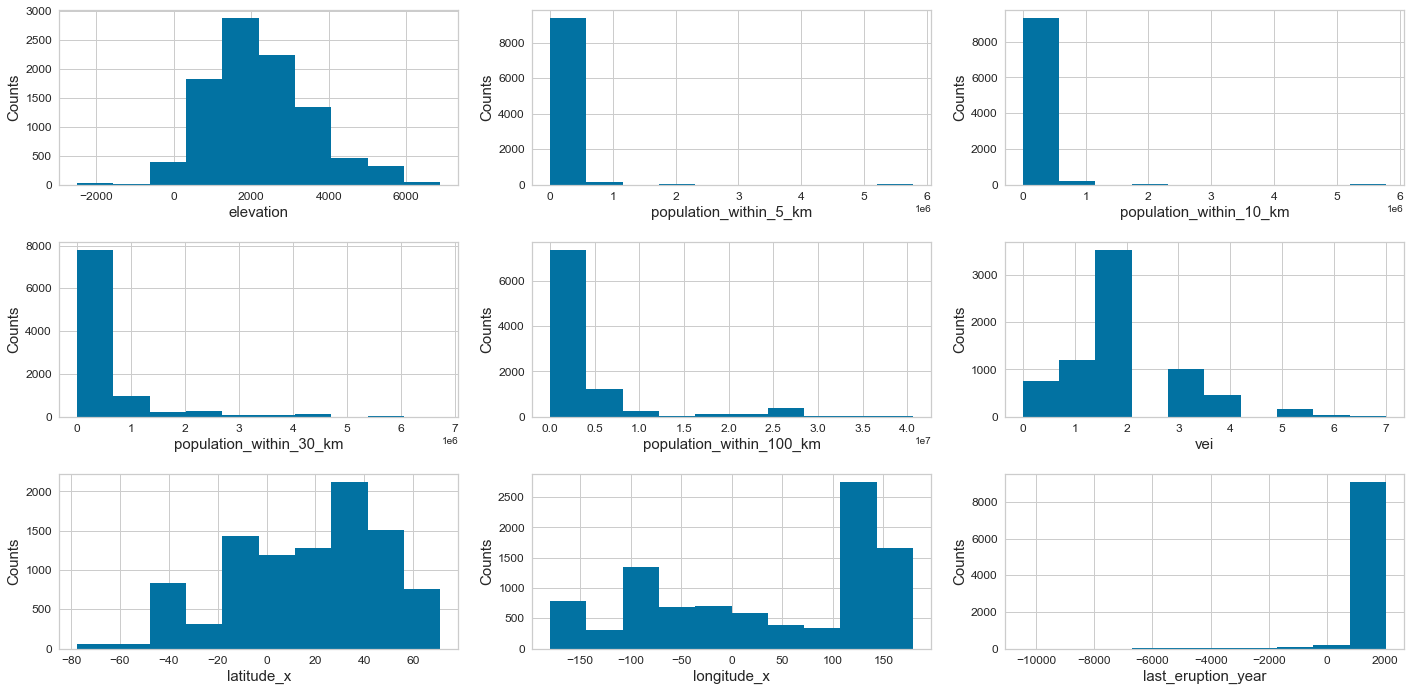

In [74]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# create the subplots
fig, axes = plt.subplots(nrows = 3, ncols = 3)

# Specify the features of interest
num_features = ['elevation', 'population_within_5_km', 'population_within_10_km', 
                'population_within_30_km', 'population_within_100_km', 'vei', 'latitude_x',
               'longitude_x', 'last_eruption_year']

xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts']

# Draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=10)
    ax.set_xlabel(xaxes[idx], fontsize=15)
    ax.set_ylabel(yaxes[idx], fontsize=15)
    ax.tick_params(axis='both', labelsize=12)
plt.tight_layout()

#### Bar Charts
Below I have created bar charts to look at eruptions by volcano type, continent, eruption category and eruption evidence. We can see from the bar charts below, that the most common volcano type is the stratovolcano, while the most common continent where eruptions have occurred is Asia. Majority of the eruptions were observed and confirmed. 

In [75]:
# Our unique types of volcano
# I wanted to see the best way to group these for the bar charts
# in order to have less categories

df['primary_volcano_type'].unique()

array(['Shield(s)', 'Stratovolcano(es)', 'Caldera', 'Stratovolcano',
       'Submarine', 'Shield', 'Fissure vent(s)', 'Compound', 'Complex',
       'Pyroclastic shield', 'Pyroclastic cone(s)', 'Pyroclastic cone',
       'Volcanic field', 'Caldera(s)', 'Lava dome(s)', 'Lava cone',
       'Crater rows', 'Tuff cone(s)', 'Complex(es)', 'Subglacial',
       'Maar(s)', 'Lava dome', 'Stratovolcano?'], dtype=object)

In [76]:
# When I first created the barchart of country, it was obviously cluttered as there
# are 76 countries. My goal is to group these by continent for 7 categories.

df['country'].unique()

array(['Japan', 'Guatemala', 'Turkey', 'United States', 'Ethiopia',
       'Portugal', 'Chile', 'Indonesia', 'Russia', 'Ecuador', 'Vanuatu',
       'Philippines', 'Papua New Guinea', 'Peru', 'El Salvador',
       'Nicaragua', 'Argentina', 'Djibouti', 'Costa Rica', 'Yemen',
       'China', 'United Kingdom', 'Iceland', 'Canada', 'New Zealand',
       'Undersea Features', 'Mexico', 'Kenya', 'Sudan', 'Antarctica',
       'Japan - administered by Russia', 'Norway', 'Colombia', 'Spain',
       'Cameroon', 'Italy', 'France', 'China-North Korea',
       'Colombia-Ecuador', 'Chile-Argentina', 'Iran', 'Eritrea',
       'Cape Verde', 'Uganda', 'Armenia', 'South Korea',
       'Syria-Jordan-Saudi Arabia', 'Australia', 'Tanzania', 'Madagascar',
       'DR Congo-Rwanda', 'Comoros', 'Georgia', 'Saudi Arabia', 'Grenada',
       'Saint Kitts and Nevis', 'Ethiopia-Djibouti', 'South Africa',
       'Greece', 'Fiji', 'Tonga', 'DR Congo', 'Chile-Bolivia', 'Dominica',
       'Burma (Myanmar)', 'Armenia-Azer

In [77]:
# Use the pycountry_convert library to define a function
# that will take the country name, convert the country name to the
# alpha2 code, then convert alpha2 code to the continent code,
# Use continent code to convert to continent name, return continent name

import pycountry_convert as pc

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    if country_alpha2 != 'AQ':
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name

In [78]:
# A lot of the ways the countries were written didn't feed in well to the function
# so additional cleaning was required.

df.replace(to_replace = 'Undersea Features', value = 'Other', inplace = True)
df.replace(to_replace = 'Japan - administered by Russia', value = 'Japan', inplace = True)
df.replace(to_replace = 'China-North Korea', value = 'China', inplace = True)
df.replace(to_replace = 'Colombia-Ecuador', value = 'Colombia', inplace = True)
df.replace(to_replace = 'Chile-Argentina', value = 'Chile', inplace = True)
df.replace(to_replace = 'Syria-Jordan-Saudi Arabia', value = 'Syria', inplace = True)
df.replace(to_replace = 'DR Congo-Rwanda', value = 'Congo', inplace = True)
df.replace(to_replace = 'Ethiopia-Djibouti', value = 'Ethiopia', inplace = True)
df.replace(to_replace = 'DR Congo', value = 'Congo', inplace = True)
df.replace(to_replace = 'Chile-Bolivia', value = 'Chile', inplace = True)
df.replace(to_replace = 'Burma (Myanmar)', value = 'Myanmar', inplace = True)
df.replace(to_replace = 'Burma', value = 'Myanmar', inplace = True)
df.replace(to_replace = 'Armenia-Azerbaijan', value = 'Armenia', inplace = True)
df.replace(to_replace = 'Mexico-Guatemala', value = 'Mexico', inplace = True)
df.replace(to_replace = 'Chile-Peru', value = 'Chile', inplace = True)

In [79]:
# Take a look to be sure the replacements were made acceptably.

df['country'].unique()

array(['Japan', 'Guatemala', 'Turkey', 'United States', 'Ethiopia',
       'Portugal', 'Chile', 'Indonesia', 'Russia', 'Ecuador', 'Vanuatu',
       'Philippines', 'Papua New Guinea', 'Peru', 'El Salvador',
       'Nicaragua', 'Argentina', 'Djibouti', 'Costa Rica', 'Yemen',
       'China', 'United Kingdom', 'Iceland', 'Canada', 'New Zealand',
       'Other', 'Mexico', 'Kenya', 'Sudan', 'Antarctica', 'Norway',
       'Colombia', 'Spain', 'Cameroon', 'Italy', 'France', 'Iran',
       'Eritrea', 'Cape Verde', 'Uganda', 'Armenia', 'South Korea',
       'Syria', 'Australia', 'Tanzania', 'Madagascar', 'Congo', 'Comoros',
       'Georgia', 'Saudi Arabia', 'Grenada', 'Saint Kitts and Nevis',
       'South Africa', 'Greece', 'Fiji', 'Tonga', 'Dominica', 'Myanmar',
       'Saint Lucia', 'Netherlands', 'Samoa', 'Solomon Islands',
       'Saint Vincent and the Grenadines', 'Mongolia', 'Taiwan',
       'Germany'], dtype=object)

In [80]:
# I decided to drop the rows where the country was other (originally undersea features)
# as I did not know which continent this should fall in, and the number of rows was minimal enough.

df.drop(df[df['country'] == 'Other'].index, inplace = True)

In [81]:
# Check the shape to see how many rows were removed

df.shape

(9523, 40)

In [82]:
# Create an empty list to loop through the countries and call the function for each 
# country, and append to the empty list

cont = []

for x in df['country']:
    cont.append(country_to_continent(x))

In [83]:
# Add the list of continents to the data frame

df['continent'] = cont

In [84]:
# Let's check our categories

df['continent'].unique()

array(['Asia', 'North America', 'Africa', 'Europe', 'South America',
       'Oceania', None], dtype=object)

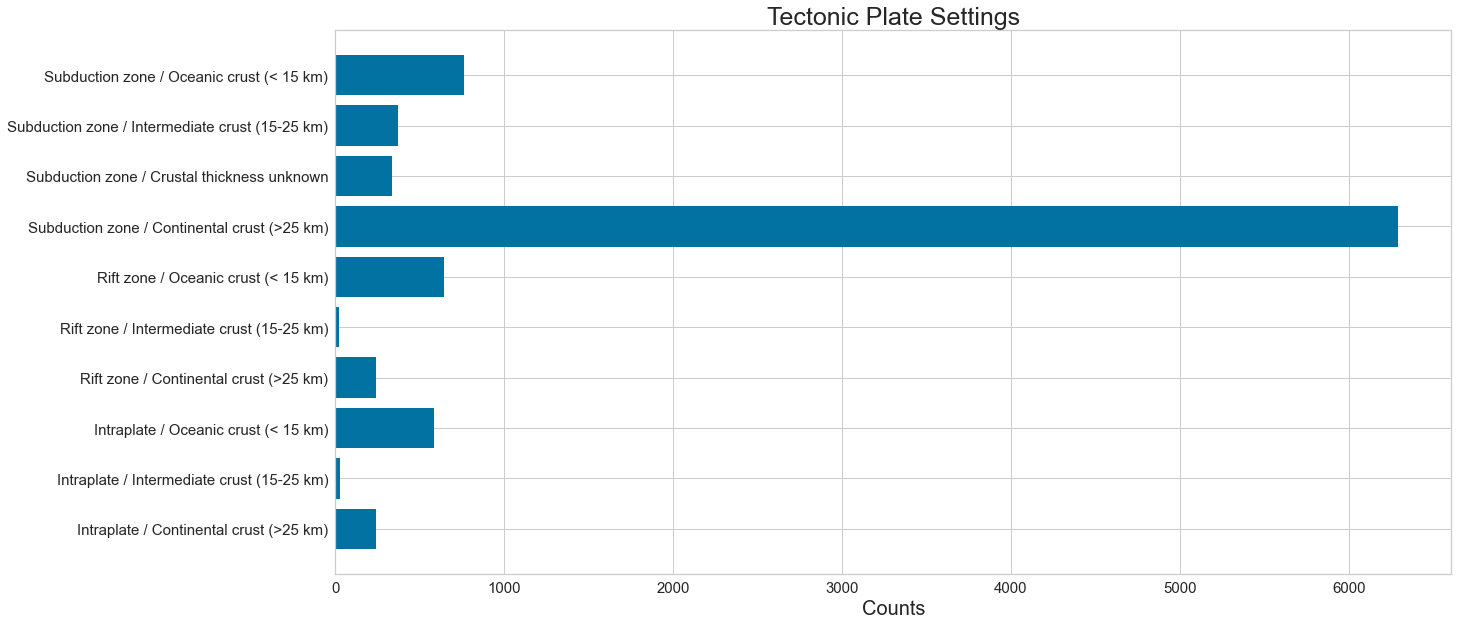

In [85]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (20, 10)

fig, ax = plt.subplots()

# Make the data ready to feed into the visualizer
X_plates = df.groupby('tectonic_settings').size().reset_index(name='Counts')['tectonic_settings']
Y_plates = df.groupby('tectonic_settings').size().reset_index(name='Counts')['Counts']

ax.barh(X_plates, Y_plates)
ax.set_title('Tectonic Plate Settings', fontsize=25)
ax.set_xlabel('Counts', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

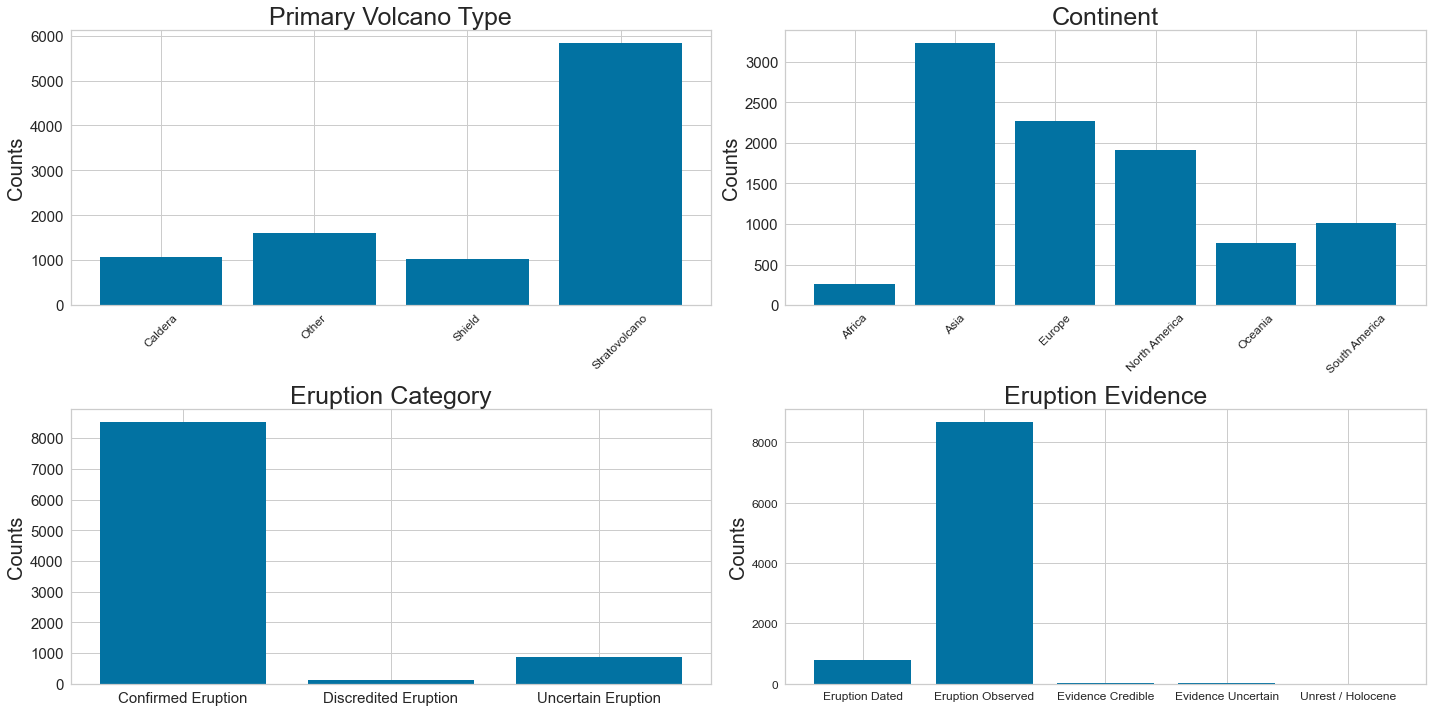

In [86]:
%matplotlib inline

# Set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# Create the subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Make the data ready to feed into the visualizer
X_category = df.replace({'primary_volcano_type': {'Lava dome': 'Other', 'Maar(s)': 'Other', 'Subglacial': 'Other', 
                                                  'Complex(es)': 'Other','Tuff cone(s)': 'Other', 'Crater rows': 'Other', 
                                                  'Lava cone': 'Other', 'Lava dome(s)': 'Other','Volcanic field': 'Other', 
                                                  'Pyroclastic cone': 'Other', 'Pyroclastic cone(s)': 'Other', 
                                                  'Pyroclastic shield': 'Other', 'Complex': 'Other', 'Compound': 'Other', 
                                                  'Fissure vent(s)': 'Other', 'Submarine': 'Other', 'Shield(s)': 'Shield', 
                                                  'Stratovolcano(es)': 'Stratovolcano','Stratovolcano?': 'Stratovolcano', 
                                                  'Caldera(s)': 'Caldera'}}).groupby('primary_volcano_type').size().reset_index(name='Counts')['primary_volcano_type']

Y_category = df.replace({'primary_volcano_type': {'Lava dome': 'Other', 'Maar(s)': 'Other', 'Subglacial': 'Other', 
                                                  'Complex(es)': 'Other','Tuff cone(s)': 'Other', 'Crater rows': 'Other', 
                                                  'Lava cone': 'Other', 'Lava dome(s)': 'Other','Volcanic field': 'Other', 
                                                  'Pyroclastic cone': 'Other', 'Pyroclastic cone(s)': 'Other', 
                                                  'Pyroclastic shield': 'Other', 'Complex': 'Other', 'Compound': 'Other', 
                                                  'Fissure vent(s)': 'Other', 'Submarine': 'Other', 'Shield(s)': 'Shield', 
                                                  'Stratovolcano(es)': 'Stratovolcano','Stratovolcano?': 'Stratovolcano', 
                                                  'Caldera(s)': 'Caldera'}}).groupby('primary_volcano_type').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[0, 0].bar(X_category, Y_category)
axes[0, 0].set_title('Primary Volcano Type', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='x', labelsize=12, rotation=45)
axes[0, 0].tick_params(axis='y', labelsize=15)

# Make the data ready to feed into the visualizer
X_country = df.groupby('continent').size().reset_index(name='Counts')['continent']
Y_country = df.groupby('continent').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[0, 1].bar(X_country, Y_country)
axes[0, 1].set_title('Continent', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='x', labelsize=12, rotation=45)
axes[0, 1].tick_params(axis='y', labelsize=15)

# Make the data ready to feed into the visualizer
X_category = df.groupby('eruption_category').size().reset_index(name='Counts')['eruption_category']
Y_category = df.groupby('eruption_category').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[1, 0].bar(X_category, Y_category)
axes[1, 0].set_title('Eruption Category', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# Make the data ready to feed into the visualizer
X_evidence = df.groupby('evidence_category').size().reset_index(name='Counts')['evidence_category']
Y_evidence = df.groupby('evidence_category').size().reset_index(name='Counts')['Counts']

# Create the bar plot
axes[1, 1].bar(X_evidence, Y_evidence)
axes[1, 1].set_title('Eruption Evidence', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=12)
plt.tight_layout()

#### Pearson Ranking
Based on the histograms above, I reduced the features to only include the population on the high end of distance and the low end of distance (5 km and 100 km). We can see a low positive correlation between elevation and population within 100 km, and a low negative correlation between elevation and population within 5 km.   

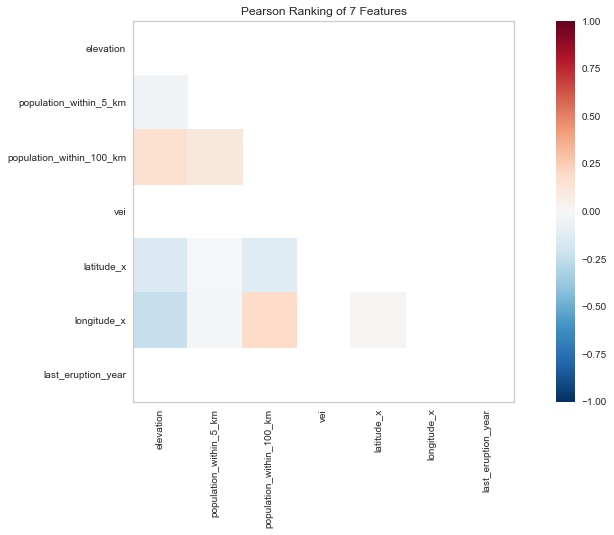

<AxesSubplot:title={'center':'Pearson Ranking of 7 Features'}>

In [87]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

num_features_1 = ['elevation', 'population_within_5_km',
                  'population_within_100_km', 'vei', 'latitude_x', 'longitude_x', 'last_eruption_year']

# extract the numpy arrays from the data frame
X = df[num_features_1].to_numpy()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features_1, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath=r"C:\Users\17742\OneDrive\Pictures\pcoords1.png") 
# Draw/show/poof the data
visualizer.show()

#### Stack Bar Charts
The data required some additional cleaning before making the stacked bar charts.  I dropped all rows that had NaN as the VEI value.  I converted the VEI values to integers (64 bit) in order to drop the trailing zeroes. I created a new feature (Target vei) in order to have Small and Large for the VEI result. The wikipedia source reference above categorizes 4+ as large, so this is what I used. I also created another column in the dataframe to split the volcano types into the 3 main types discussed, and other. The stack bar chart results show what we expect, a smaller amount of volcanoes with a large VEI compared to small VEI. The results for continent do appear to have slightly more volcanoes with large VEI compared to other continents.  We would anticipate small VEI for volcanoes that were not confirmed or there was no evidence. 

In [88]:
# Drop rows with NaN values from VEI to clean up target variable

df = df.dropna(subset=['vei'])
df = df.reset_index(drop = True)

In [89]:
# Convert to int64 to remove trailing decimal

df['vei'] = df['vei'].astype(np.int64)

In [90]:
# Confirm unique values are from 0 to 7

df['vei'].unique()

array([1, 2, 3, 4, 5, 0, 6, 7], dtype=int64)

In [91]:
# I decided to group by VEI 0-3 and 4+. The wikipedia source referenced above
# categorizes 4+ as large

target = []

for x in df['vei']:
    if x >= 0 and x < 4:
        target.append('Small')
    if x >= 4 and x < 8:
        target.append('Large')

In [92]:
# Add column to the data frame

df['Target_vei'] = target

In [93]:
# Use a for loop to group the various volcano types into 3 main categories and other

volcano_category = []

for x in df['primary_volcano_type']:
    if x == 'Shield(s)':
        volcano_category.append('Shield')
    elif x == 'Stratovolcano(es)':
        volcano_category.append('Stratovolcano')
    elif x == 'Stratovolcano?':
        volcano_category.append('Stratovolcano')
    elif x == 'Stratovolcano':
        volcano_category.append('Stratovolcano')
    elif x == 'Caldera(s)':
        volcano_category.append('Caldera')
    else:
        volcano_category.append('Other')


In [94]:
# Add column to the data frame

df['volcano_type'] = volcano_category

In [95]:
df['volcano_type']

0       Stratovolcano
1       Stratovolcano
2       Stratovolcano
3       Stratovolcano
4       Stratovolcano
            ...      
7120            Other
7121            Other
7122            Other
7123            Other
7124            Other
Name: volcano_type, Length: 7125, dtype: object

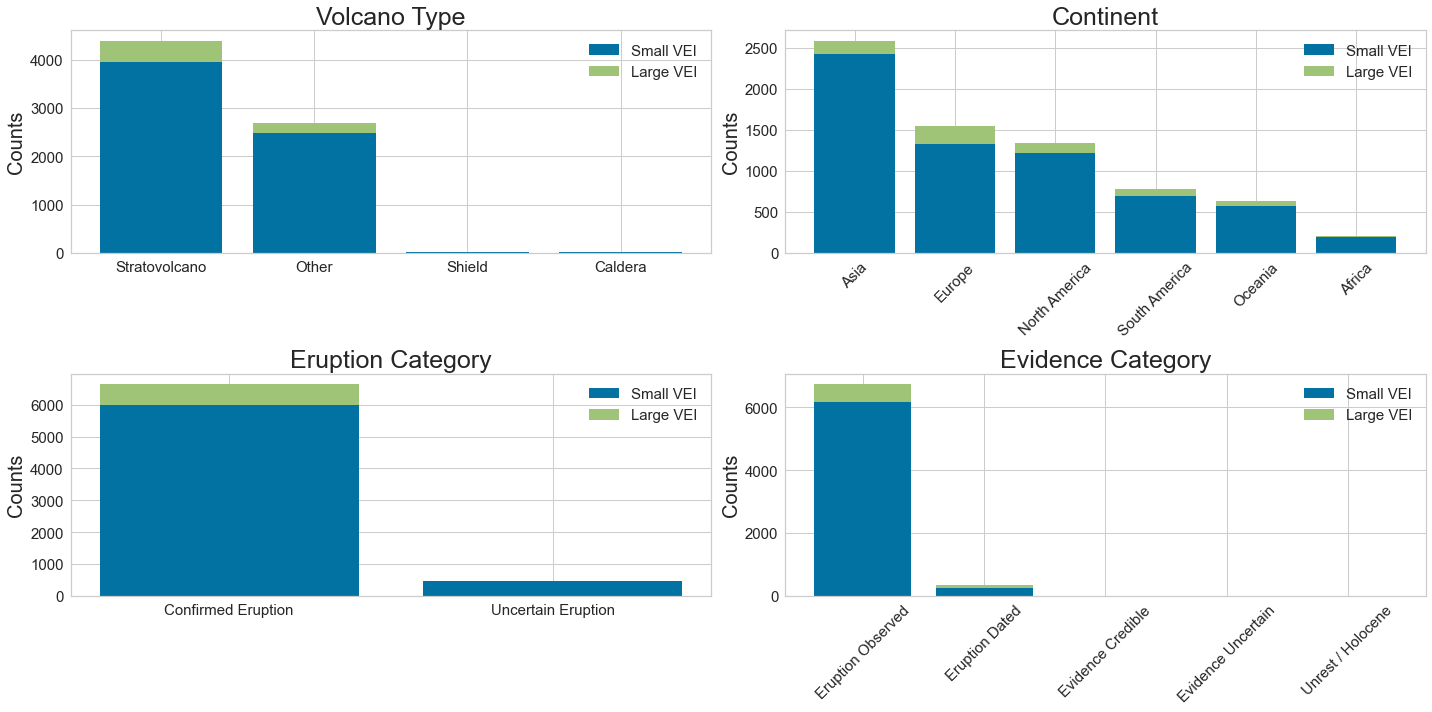

In [96]:
%matplotlib inline

# Set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# Create the subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Make the data ready to feed into the visualizer
voltype_vei_small = df.replace({'Target_vei': {1: 'Small', 0: 'Large'}})[df['Target_vei']=='Small']['volcano_type'].value_counts()
voltype_vei_large = df.replace({'Target_vei': {1: 'Small', 0: 'Large'}})[df['Target_vei']=='Large']['volcano_type'].value_counts()
voltype_vei_large = voltype_vei_large.reindex(index = voltype_vei_small.index)

# Create the bar plot
p1 = axes[0, 0].bar(voltype_vei_small.index, voltype_vei_small.values)
p2 = axes[0, 0].bar(voltype_vei_large.index, voltype_vei_large.values, bottom=voltype_vei_small.values)
axes[0, 0].set_title('Volcano Type', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Small VEI', 'Large VEI'), fontsize = 15)

# Make the data ready to feed into the visualizer
cont_vei_small = df.replace({'Target_vei': {1: 'Small', 0: 'Large'}})[df['Target_vei']=='Small']['continent'].value_counts()
cont_vei_large = df.replace({'Target_vei': {1: 'Small', 0: 'Large'}})[df['Target_vei']=='Large']['continent'].value_counts()
cont_vei_large = cont_vei_large.reindex(index = cont_vei_small.index)

# Create the bar plot
p3 = axes[0, 1].bar(cont_vei_small.index, cont_vei_small.values)
p4 = axes[0, 1].bar(cont_vei_large.index, cont_vei_large.values, bottom=cont_vei_small.values)
axes[0, 1].set_title('Continent', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend((p3[0], p4[0]), ('Small VEI', 'Large VEI'), fontsize = 15)

# Make the data ready to feed into the visualizer
erupt_vei_small = df.replace({'Target_vei': {1: 'Small', 0: 'Large'}})[df['Target_vei']=='Small']['eruption_category'].value_counts()
erupt_vei_large = df.replace({'Target_vei': {1: 'Small', 0: 'Large'}})[df['Target_vei']=='Large']['eruption_category'].value_counts()
erupt_vei_large = erupt_vei_large.reindex(index = erupt_vei_small.index)

# Create the bar plot
p5 = axes[1, 0].bar(erupt_vei_small.index, erupt_vei_small.values)
p6 = axes[1, 0].bar(erupt_vei_large.index, erupt_vei_large.values, bottom=erupt_vei_small.values)
axes[1, 0].set_title('Eruption Category', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Small VEI', 'Large VEI'), fontsize = 15)

# Make the data ready to feed into the visualizer
evidence_vei_small = df.replace({'Target_vei': {1: 'Small', 0: 'Large'}})[df['Target_vei']=='Small']['evidence_category'].value_counts()
evidence_vei_large = df.replace({'Target_vei': {1: 'Small', 0: 'Large'}})[df['Target_vei']=='Large']['evidence_category'].value_counts()
evidence_vei_large = evidence_vei_large.reindex(index = evidence_vei_small.index)

# Create the bar plot
p7 = axes[1, 1].bar(evidence_vei_small.index, evidence_vei_small.values)
p8 = axes[1, 1].bar(evidence_vei_large.index, evidence_vei_large.values, bottom=evidence_vei_small.values)
axes[1, 1].set_title('Evidence Category', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend((p7[0], p8[0]), ('Small VEI', 'Large VEI'), fontsize = 15)

plt.tight_layout()



#### Reduce Features
I dropped any columns that would not be used, which was quite a few because we had merged two datasets. I used a for loop to check for missing values and Continent had a few. I replaced the missing values with the most common continent, Asia. 

In [97]:
df.columns

Index(['volcano_number', 'volcano_name_x', 'primary_volcano_type',
       'last_eruption_year', 'country', 'region', 'subregion', 'latitude_x',
       'longitude_x', 'elevation', 'tectonic_settings', 'evidence_category',
       'major_rock_1', 'major_rock_2', 'major_rock_3', 'major_rock_4',
       'major_rock_5', 'minor_rock_1', 'minor_rock_2', 'minor_rock_3',
       'minor_rock_4', 'minor_rock_5', 'population_within_5_km',
       'population_within_10_km', 'population_within_30_km',
       'population_within_100_km', 'volcano_name_y', 'eruption_number',
       'eruption_category', 'area_of_activity', 'vei', 'start_year',
       'start_month', 'start_day', 'evidence_method_dating', 'end_year',
       'end_month', 'end_day', 'latitude_y', 'longitude_y', 'continent',
       'Target_vei', 'volcano_type'],
      dtype='object')

In [98]:
df['year_null'] = df['last_eruption_year'].isnull()
year_none = df.loc[df['year_null'] == True]
print(year_none['start_year'])
print(year_none['end_year'])

28      1928.0
29      1828.0
92      1251.0
202     1952.0
297     1993.0
807     1931.0
908     1812.0
1103    1974.0
1566    1927.0
4716    1550.0
5050    1990.0
5573    1893.0
6162    1937.0
Name: start_year, dtype: float64
28         NaN
29         NaN
92         NaN
202        NaN
297        NaN
807        NaN
908        NaN
1103    1974.0
1566       NaN
4716       NaN
5050    1990.0
5573       NaN
6162       NaN
Name: end_year, dtype: float64


In [99]:
def fill_na(data, inplace=True):
    return data.fillna(df['start_year'], inplace=inplace)

In [100]:
fill_na(df['last_eruption_year'])

In [101]:
# Let's drop the columns that we will not be using

df = df.drop('volcano_number', axis=1)
df = df.drop('volcano_name_x', axis=1)
df = df.drop('region', axis=1)
df = df.drop('subregion', axis=1)
df = df.drop('major_rock_1', axis=1)
df = df.drop('major_rock_2', axis=1)
df = df.drop('major_rock_3', axis=1)
df = df.drop('major_rock_4', axis=1)
df = df.drop('major_rock_5', axis=1)
df = df.drop('minor_rock_1', axis=1)
df = df.drop('minor_rock_2', axis=1)
df = df.drop('minor_rock_3', axis=1)
df = df.drop('minor_rock_4', axis=1)
df = df.drop('minor_rock_5', axis=1)
df = df.drop('volcano_name_y', axis=1)
df = df.drop('eruption_number', axis=1)
df = df.drop('area_of_activity', axis=1)
df = df.drop('start_year', axis=1)
df = df.drop('start_month', axis=1)
df = df.drop('start_day', axis=1)
df = df.drop('evidence_method_dating', axis=1)
df = df.drop('end_year', axis=1)
df = df.drop('end_month', axis=1)
df = df.drop('end_day', axis=1)
df = df.drop('latitude_y', axis=1) # repeat of latitude x
df = df.drop('longitude_y', axis=1) # repeat of longitude x
df = df.drop('primary_volcano_type', axis=1) # categorized this as volcano_type

In [102]:
df.head(20)

,last_eruption_year,country,latitude_x,longitude_x,elevation,tectonic_settings,evidence_category,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km,eruption_category,vei,continent,Target_vei,volcano_type,year_null
0,1972.0,Guatemala,14.501,-90.876,3976,Subduction zone / Continental crust (>25 km),Eruption Observed,4329,60730,1042836,7634778,Confirmed Eruption,1,North America,Small,Stratovolcano,False
1,1972.0,Guatemala,14.501,-90.876,3976,Subduction zone / Continental crust (>25 km),Eruption Observed,4329,60730,1042836,7634778,Confirmed Eruption,2,North America,Small,Stratovolcano,False
2,1972.0,Guatemala,14.501,-90.876,3976,Subduction zone / Continental crust (>25 km),Eruption Observed,4329,60730,1042836,7634778,Confirmed Eruption,3,North America,Small,Stratovolcano,False
3,950.0,United States,46.206,-121.490,3742,Subduction zone / Continental crust (>25 km),Eruption Dated,0,70,4019,393303,Confirmed Eruption,2,North America,Small,Stratovolcano,False
4,950.0,United States,46.206,-121.490,3742,Subduction zone / Continental crust (>25 km),Eruption Dated,0,70,4019,393303,Confirmed Eruption,2,North America,Small,Stratovolcano,False
5,950.0,United States,46.206,-121.490,3742,Subduction zone / Continental crust (>25 km),Eruption Dated,0,70,4019,393303,Confirmed Eruption,2,North America,Small,Stratovolcano,False
6,950.0,United States,46.206,-121.490,3742,Subduction zone / Continental crust (>25 km),Eruption Dated,0,70,4019,393303,Confirmed Eruption,2,North America,Small,Stratovolcano,False
7,950.0,United States,46.206,-121.490,3742,Subduction zone / Continental crust (>25 km),Eruption Dated,0,70,4019,393303,Confirmed Eruption,2,North America,Small,Stratovolcano,False
8,950.0,United States,46.206,-121.490,3742,Subduction zone / Continental crust (>25 km),Eruption Dated,0,70,4019,393303,Confirmed Eruption,1,North America,Small,Stratovolcano,False
9,950.0,United States,46.206,-121.490,3742,Subduction zone / Continental crust (>25 km),Eruption Dated,0,70,4019,393303,Confirmed Eruption,2,North America,Small,Stratovolcano,False


In [103]:
# Check for variables that have missing values.

for c in df.columns:
    missing = df[c].isnull().sum()
    if missing > 0:
        print("{} has {} missing value(s)".format(c, missing))
    else:
        print("{} has NO missing value(s)".format(c, missing))

last_eruption_year has NO missing value(s)
country has NO missing value(s)
latitude_x has NO missing value(s)
longitude_x has NO missing value(s)
elevation has NO missing value(s)
tectonic_settings has NO missing value(s)
evidence_category has NO missing value(s)
population_within_5_km has NO missing value(s)
population_within_10_km has NO missing value(s)
population_within_30_km has NO missing value(s)
population_within_100_km has NO missing value(s)
eruption_category has NO missing value(s)
vei has NO missing value(s)
continent has 31 missing value(s)
Target_vei has NO missing value(s)
volcano_type has NO missing value(s)
year_null has NO missing value(s)


In [104]:
# After some additional investigation into the data, we can see that the
# 31 rows where the continent was blank, is actually because it is Antarctica,
# and our continent searcher was using country, and must not have recognized
# this because it is actually our continent.

df['continent_null'] = df['continent'].isnull()
country_none = df.loc[df['continent_null'] == True]
print(country_none['country'])

907     Antarctica
1004    Antarctica
1005    Antarctica
1423    Antarctica
1424    Antarctica
1425    Antarctica
1426    Antarctica
1427    Antarctica
1534    Antarctica
1535    Antarctica
1536    Antarctica
1537    Antarctica
1538    Antarctica
1539    Antarctica
1540    Antarctica
1541    Antarctica
1542    Antarctica
1543    Antarctica
1544    Antarctica
1545    Antarctica
1546    Antarctica
1547    Antarctica
1548    Antarctica
1549    Antarctica
1550    Antarctica
1551    Antarctica
1552    Antarctica
1553    Antarctica
1554    Antarctica
2564    Antarctica
5573    Antarctica
Name: country, dtype: object


In [105]:
# Based on the information above, I have populated our continent
# as appropriate.

def fill_na_most(data, inplace=True):
    return data.fillna('Antarctica', inplace=inplace)

In [106]:
fill_na_most(df['continent'])

# check the result
print(df['continent'].describe())

count     7125
unique       7
top       Asia
freq      2585
Name: continent, dtype: object


#### Transformation
All of the population data was highly skewed so we will use log transformation

In [107]:
# log-transformation
def log_transformation(data):
    return data.apply(np.log1p)

In [108]:
df['pop_5km_log'] = log_transformation(df['population_within_5_km'])
df['pop_10km_log'] = log_transformation(df['population_within_10_km'])
df['pop_30km_log'] = log_transformation(df['population_within_30_km'])
df['pop_100km_log'] = log_transformation(df['population_within_100_km'])

# check the data
print(df.describe())

       last_eruption_year   latitude_x  longitude_x    elevation  \
count         7125.000000  7125.000000  7125.000000  7125.000000   
mean          1876.353965    14.505570    43.748768  2244.508632   
std            681.698242    30.342833   111.241737  1318.607527   
min         -10450.000000   -77.530000  -179.970000 -2050.000000   
25%           1984.000000    -7.540000   -71.930000  1281.000000   
50%           2014.000000    14.473000   106.965000  1978.000000   
75%           2020.000000    37.748000   139.394000  3053.000000   
max           2020.000000    71.082000   179.580000  6879.000000   

       population_within_5_km  population_within_10_km  \
count            7.125000e+03             7.125000e+03   
mean             3.758345e+04             5.878540e+04   
std              2.455064e+05             2.554919e+05   
min              0.000000e+00             0.000000e+00   
25%              1.700000e+01             1.560000e+02   
50%              4.770000e+02          

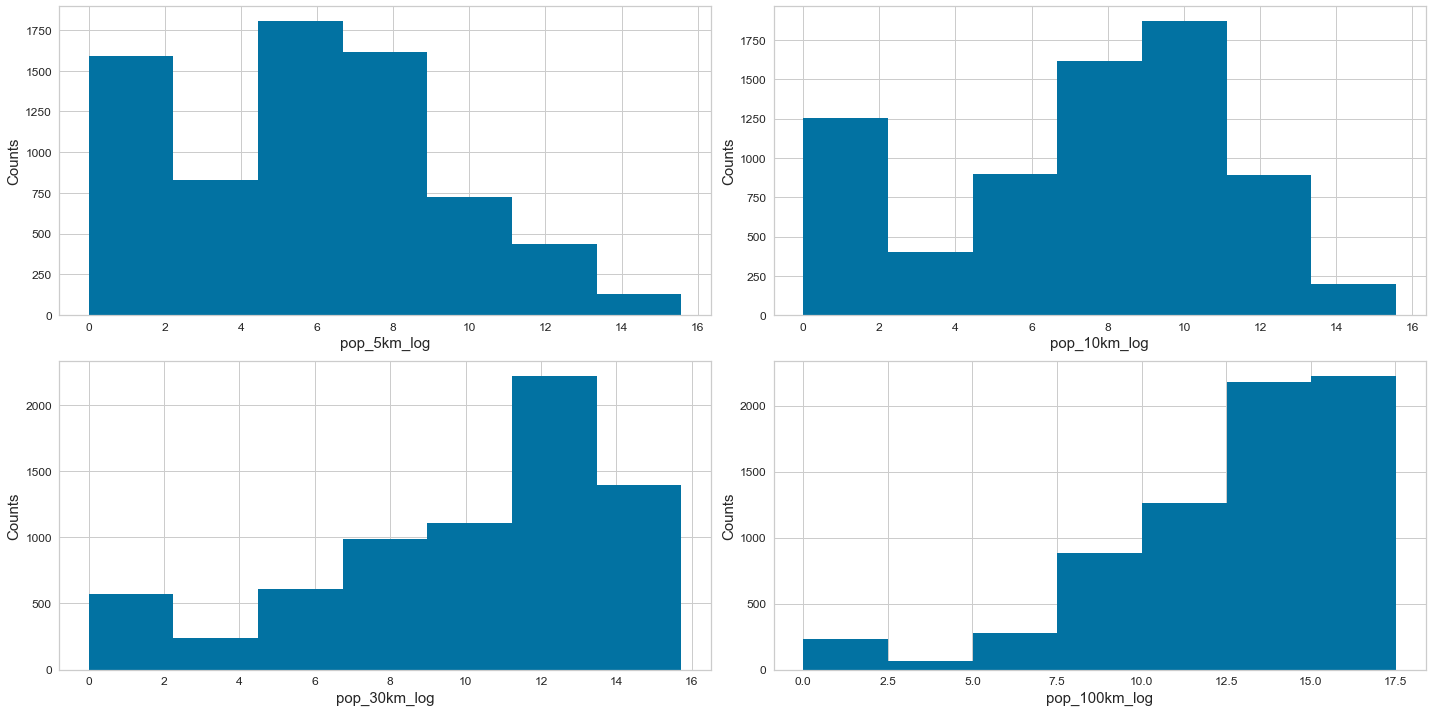

In [109]:
# Adjust the skewed data through transformation

# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# create the subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['pop_5km_log', 'pop_10km_log', 'pop_30km_log', 'pop_100km_log']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# Draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=7)
    ax.set_xlabel(xaxes[idx], fontsize=15)
    ax.set_ylabel(yaxes[idx], fontsize=15)
    ax.tick_params(axis='both', labelsize=12)
plt.tight_layout()

#### Convert Categorical Data into Numbers

In [110]:
df.dtypes

last_eruption_year          float64
country                      object
latitude_x                  float64
longitude_x                 float64
elevation                     int64
tectonic_settings            object
evidence_category            object
population_within_5_km        int64
population_within_10_km       int64
population_within_30_km       int64
population_within_100_km      int64
eruption_category            object
vei                           int64
continent                    object
Target_vei                   object
volcano_type                 object
year_null                      bool
continent_null                 bool
pop_5km_log                 float64
pop_10km_log                float64
pop_30km_log                float64
pop_100km_log               float64
dtype: object

In [111]:
# Assign variable to cat_features

cat_features = ['evidence_category', 'eruption_category', 'continent', 'volcano_type', 'tectonic_settings']
data_cat = df[cat_features]

In [112]:
# One hot encoding
data_cat_dummies = pd.get_dummies(data_cat)

# Check the data
print(data_cat_dummies.head(10))

   evidence_category_Eruption Dated  evidence_category_Eruption Observed  \
0                                 0                                    1   
1                                 0                                    1   
2                                 0                                    1   
3                                 1                                    0   
4                                 1                                    0   
5                                 1                                    0   
6                                 1                                    0   
7                                 1                                    0   
8                                 1                                    0   
9                                 1                                    0   

   evidence_category_Evidence Credible  evidence_category_Evidence Uncertain  \
0                                    0                                     0   
1  

#### Training - Split your data into two sets: Training and Testing

In [113]:
# Create a features data set that can be used for splitting the
# data into test and train for validation
# Combine numerical features and dummy features

features_model = ['last_eruption_year', 'latitude_x', 'longitude_x', 'elevation', 
                 'pop_5km_log', 'pop_10km_log', 'pop_30km_log', 'pop_100km_log']

data_model_X = pd.concat([df[features_model], data_cat_dummies], axis=1)

In [114]:
# Create a target data set that can be used for splitting the 
# data into test and train for validation

data_model_y = df.replace({'Target_vei': {1: 'Small', 0: 'Large'}})['Target_vei']

In [115]:
# Split the data

X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

In [116]:
# Number of samples in each set

print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Small and large VEI
print('\n')
print('No. of small and large VEI in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of small and large VEI in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  4987
No. of samples in validation set: 2138


No. of small and large VEI in the training set:
Small    4546
Large     441
Name: Target_vei, dtype: int64


No. of small and large VEI in the validation set:
Small    1914
Large     224
Name: Target_vei, dtype: int64


C:\Users\17742\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\17742\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


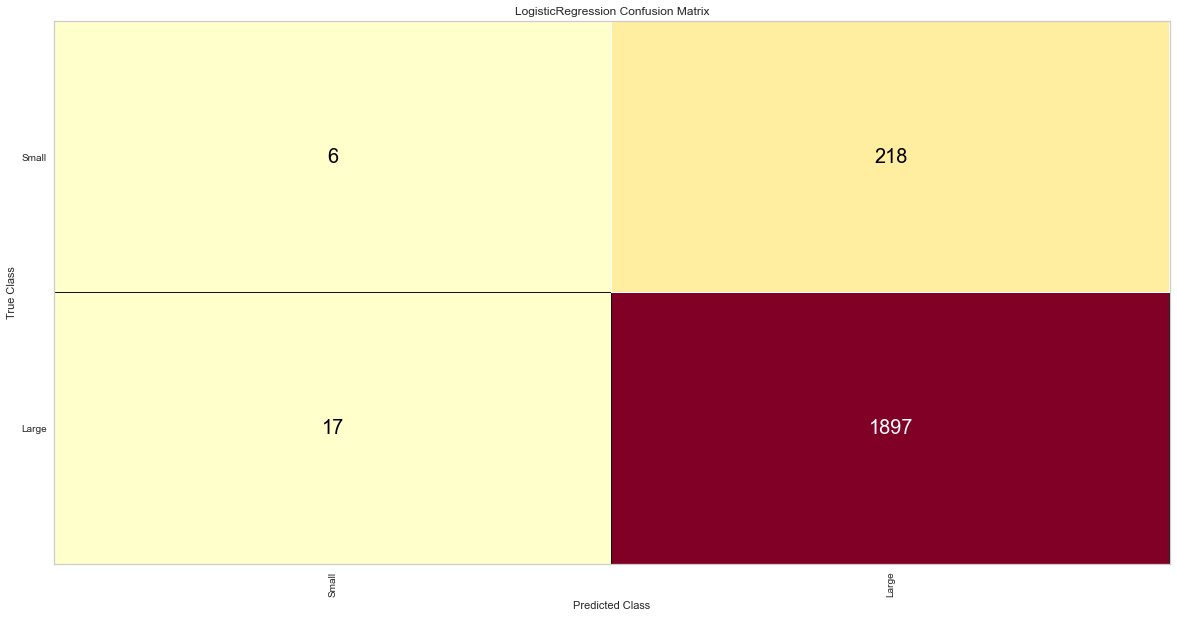

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [117]:
# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['Small','Large']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)
    
cm.poof()

In [118]:
# The confusion matrix score is 89%

cm.score(X_val, y_val)

0.8900841908325537

### Results/Conclusion

#### Confusion Matrix
The confusion matrix allows for a visualization of the performance of an algorithm. Our goal with the above model is to use the factors we have in order to predict small or large VEI, thus indicating a small or large volcano explosivity.  The results show 6 true positive, meaning the algorithm predicted 6 small VEI, and there were actually 6 small VEI. In turn, we have 1,897 predicted large and actually large.  17 were actually small and predicted as large (false negative) and 218 were actually large and predicted as small (false positive). 

#### Precision, Recall and F1 score
Precision is defined as the fraction of relevant instances among the retrieved instances, while recall is the fraction of the total amount of relevant instances that were actually retrieved.  Precision is also called positive predictive value while recall is also known as sensitivity. Out of all volcanos that had small VEI, precision tells us the percentage that actually were small VEI. Recall tells us what percentage of actual positive predictions were correctly classified. F1 score provides a standardization of precision-recall values in order to have a metric of accuracy. We can see from the results that the precision and recall values of large VEI that they are closer to 1 which indicates good precision-recall values, and in turn, F1 score closer to 1. It is not favorable to have values of recall and precision close to zero. 

#### ROC curve
The ROC curve is a way to see how well a model can predict true positives and true negatives. The sensitivity (precision) and specificity are plotted, where the further the curve is from the diagonal line, the better the model is at deciphering positives and negatives. The AUC, area under the curve, can be used for model comparison but is also known to be quite noisy. An informed classifier would yield 0.5 for this result. Our results below show a 0.7 for both large and small VEI. A result of 1 would indicate perfect performance. 

C:\Users\17742\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


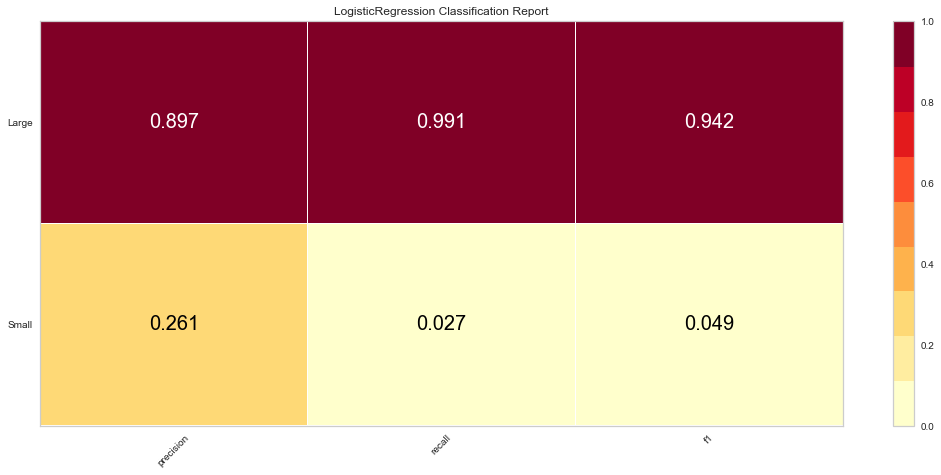

C:\Users\17742\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


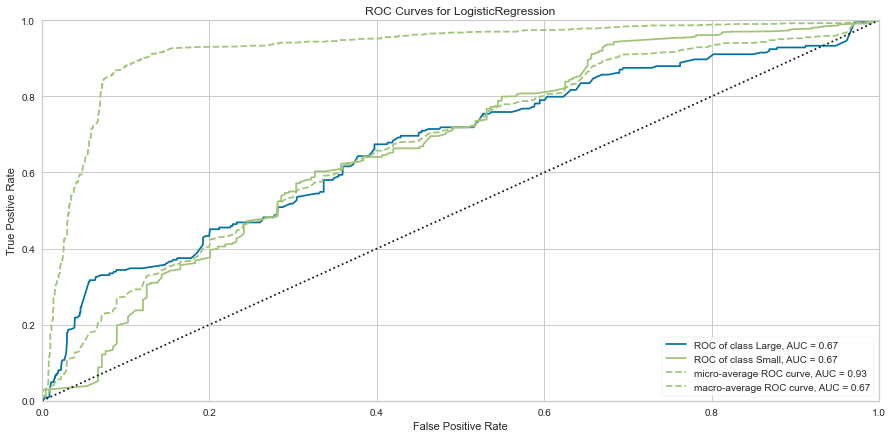

In [119]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()


In [120]:
# I commented out the map below because it was causing the program to lag greatly.  

#volcano_map = folium.Map()

# Add each volcano to the map
#for i in range(0, df.shape[0]):
#    volcano = df.iloc[i]
#    folium.Marker([volcano['latitude_x'], volcano['longitude_x']], popup=volcano['volcano_type']).add_to(volcano_map)

#volcano_map